In [460]:
#Required Imports
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta, MO
import math as math
import scipy.optimize as optimize

In [461]:
#bonds selected, justification in report
bonds_selected=['CA135087K866','CA135087L369','CA135087L856','CA135087M763','CA135087M920','CA135087M508',
                'CA135087K528', 'CA135087K940','CA135087L518', 'CA135087L930','CA135087M847']

bonds_df=pd.read_csv('APM466A1.csv')
bonds_df['MATURITY DATE']=pd.to_datetime(bonds_df['MATURITY DATE'])
bonds_df['Issue Date']=pd.to_datetime(bonds_df['Issue Date'])
bonds_df['COUPON']=bonds_df['COUPON'].str.rstrip('%').astype('float')
bonds_df.sort_values(by=['MATURITY DATE'],inplace=True)
bonds_df=bonds_df[bonds_df['ISIN'].isin(bonds_selected)]





In [462]:
bonds_df

,ISIN,COUPON,Issue Date,MATURITY DATE,1/10/2022,1/11/2022,1/12/2022,1/13/2022,1/14/2022,1/17/2022,1/18/2022,1/19/2022,1/20/2022,1/21/2022
7,CA135087K866,1.50,2020-01-27,2022-05-01,100.350,100.340,100.340,100.320,100.310,100.280,100.270,100.270,100.260,100.270
9,CA135087L369,0.25,2020-08-17,2022-11-01,99.550,99.540,99.520,99.520,99.500,99.430,99.400,99.420,99.430,99.460
12,CA135087L856,0.25,2021-02-05,2023-05-01,99.080,99.070,99.050,99.040,99.010,98.900,98.850,98.870,98.870,98.920
15,CA135087M763,0.50,2021-08-09,2023-11-01,98.968,98.955,98.934,98.911,98.878,98.732,98.666,98.654,98.661,98.717
16,CA135087M920,0.75,2021-10-22,2024-02-01,99.200,99.200,99.160,99.130,99.090,98.920,98.840,98.840,98.830,98.900
14,CA135087M508,0.75,2021-07-12,2024-10-01,98.555,98.560,98.530,98.485,98.440,98.205,98.115,98.125,98.140,98.275
25,CA135087K528,1.25,2019-10-11,2025-03-01,99.640,99.670,99.610,99.590,99.490,99.250,99.120,99.110,99.100,99.260
26,CA135087K940,0.50,2020-04-03,2025-09-01,96.660,96.720,96.770,96.770,96.680,96.430,96.260,96.150,96.190,96.310
28,CA135087L518,0.25,2020-10-09,2026-03-01,95.110,95.170,95.120,95.140,95.040,94.750,94.530,94.500,94.520,94.700
29,CA135087L930,1.00,2021-04-16,2026-09-01,97.660,97.700,97.670,97.695,97.585,97.240,97.020,96.960,97.000,97.225


In [463]:
#a=datetime.strptime('Jan 10 2022  1:33PM', '%b %d %Y %I:%M%p')
#b=datetime.strptime('May 1 2022  1:33PM', '%b %d %Y %I:%M%p')

def PV(r,semi_coupon,n,m,dirty_price):
    discounted_cf=[semi_coupon*math.exp(-0.5*(i+1)*r) for i in range(0,(n))]
    discounted_cf[-1]+=100*math.exp(-0.5*(n)*r)
    #print(discounted_cf)
    PV=sum(discounted_cf)
    PV=PV*math.exp((m/365)*r)
    return (PV-dirty_price)
        
    

def ytm(date,maturity_date,coupon,clean_price):
    #n=number of coupon payments left until maturity
    #I have used 181 days as is the minimum distance between 6 months in a non-leap year
    #n=math.ceil(((maturity_date-date).days)/181)
    coupondate=maturity_date
    n=0
    while (coupondate)>date:
        coupondate=coupondate-relativedelta(months=6)
        n=n+1
    #previous coupon date
    #print(n)
    prev_coup=coupondate
    #print(prev_coup)
    #dirty price=clean price plus accrued interest
    m=(date-prev_coup).days
    #print(m)
    dirty_price=clean_price+((m/365)*coupon)
    #print(dirty_price)
    PV_func=lambda r: PV(r,(coupon/2),n,m,dirty_price)
    optim=optimize.root(PV_func, 0.01)
    r=optim.x[0]
    return r
    
    
    
    


In [467]:

bonds_df['YTM-1/10/2022']=bonds_df.apply(lambda x: ytm(datetime.strptime('Jan 10 2022  12:00am', '%b %d %Y %I:%M%p'),
                                                       x['MATURITY DATE'],x['COUPON'],x['1/10/2022']),axis=1)

bonds_df['YTM-1/11/2022']=bonds_df.apply(lambda x: ytm(datetime.strptime('Jan 11 2022  12:00am', '%b %d %Y %I:%M%p'),
                                                       x['MATURITY DATE'],x['COUPON'],x['1/11/2022']),axis=1)

bonds_df['YTM-1/12/2022']=bonds_df.apply(lambda x: ytm(datetime.strptime('Jan 12 2022  12:00am', '%b %d %Y %I:%M%p'),
                                                       x['MATURITY DATE'],x['COUPON'],x['1/12/2022']),axis=1)

bonds_df['YTM-1/13/2022']=bonds_df.apply(lambda x: ytm(datetime.strptime('Jan 13 2022  12:00am', '%b %d %Y %I:%M%p'),
                                                       x['MATURITY DATE'],x['COUPON'],x['1/13/2022']),axis=1)

bonds_df['YTM-1/14/2022']=bonds_df.apply(lambda x: ytm(datetime.strptime('Jan 14 2022  12:00am', '%b %d %Y %I:%M%p'),
                                                       x['MATURITY DATE'],x['COUPON'],x['1/14/2022']),axis=1)

bonds_df['YTM-1/17/2022']=bonds_df.apply(lambda x: ytm(datetime.strptime('Jan 17 2022  12:00am', '%b %d %Y %I:%M%p'),
                                                       x['MATURITY DATE'],x['COUPON'],x['1/17/2022']),axis=1)

bonds_df['YTM-1/18/2022']=bonds_df.apply(lambda x: ytm(datetime.strptime('Jan 18 2022  12:00am', '%b %d %Y %I:%M%p'),
                                                       x['MATURITY DATE'],x['COUPON'],x['1/18/2022']),axis=1)

bonds_df['YTM-1/19/2022']=bonds_df.apply(lambda x: ytm(datetime.strptime('Jan 19 2022  12:00am', '%b %d %Y %I:%M%p'),
                                                       x['MATURITY DATE'],x['COUPON'],x['1/19/2022']),axis=1)

bonds_df['YTM-1/20/2022']=bonds_df.apply(lambda x: ytm(datetime.strptime('Jan 20 2022  12:00am', '%b %d %Y %I:%M%p'),
                                                       x['MATURITY DATE'],x['COUPON'],x['1/20/2022']),axis=1)

bonds_df['YTM-1/21/2022']=bonds_df.apply(lambda x: ytm(datetime.strptime('Jan 21 2022  12:00am', '%b %d %Y %I:%M%p'),
                                                       x['MATURITY DATE'],x['COUPON'],x['1/14/2022']),axis=1)











KeyError: '1/11/2022'

In [466]:
bonds_df.columns.values

array(['ISIN', 'COUPON', 'Issue Date', 'MATURITY DATE', '1/10/2022',
       ' 1/11/2022', '1/12/2022', '1/13/2022', '1/14/2022', '1/17/2022',
       '1/18/2022', '1/19/2022', '1/20/2022', '1/21/2022',
       'YTM-1/10/2022'], dtype=object)

In [437]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import seaborn as sns
sns.set()
plot_data=bonds_df[['MATURITY DATE','YTM-1/10/2022']].copy()
plot_data
data = [{'MATURITY_DATE': datetime.strptime('Jan 1 2022  1:33PM', '%b %d %Y %I:%M%p'),'YTM-1/10/2022':0.0}]

In [438]:
plot_data.loc[0]=list(data[0].values())
plot_data.sort_values(by='MATURITY DATE',inplace=True)
plot_data

,MATURITY DATE,YTM-1/10/2022
0,2022-01-01 13:33:00,0.000000
7,2022-05-01 00:00:00,0.003619
9,2022-11-01 00:00:00,0.008080
12,2023-05-01 00:00:00,0.009570
15,2023-11-01 00:00:00,0.010749
16,2024-02-01 00:00:00,0.011415
14,2024-10-01 00:00:00,0.012874
25,2025-03-01 00:00:00,0.013627
26,2025-09-01 00:00:00,0.014397
28,2026-03-01 00:00:00,0.014661


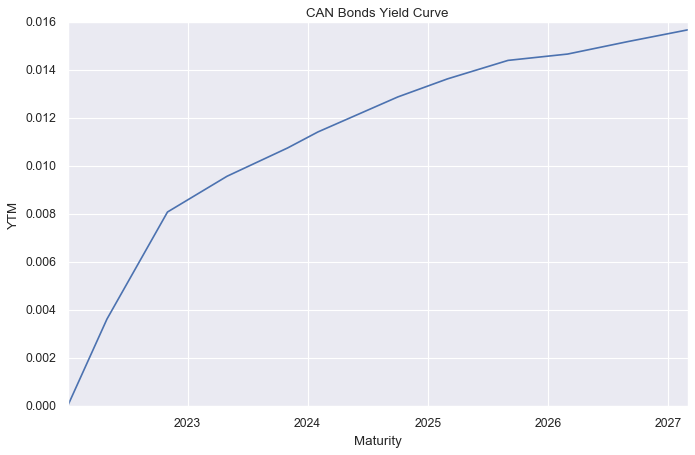

In [447]:
plt.figure(figsize=(10, 6))
plt.plot(plot_data['MATURITY DATE'],plot_data['YTM-1/10/2022'])
plt.title('CAN Bonds Yield Curve')
plt.xlabel('Maturity')
plt.ylabel('YTM')
plt.show()